https://seoyeonc.github.io/chch/cnn/feature%20extraction/big%20data%20analysis/2022/01/11/bd_9주차.html

https://seoyeonc.github.io/chch/cam/2022/01/10/bd-8주차_1.html

# import

In [13]:
import torch 
from fastai.vision.all import *
import cv2
import numpy as np
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageFile
from PIL import Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
from torchvision.utils import save_image
import os

#### (1) 랜덤박스가 들어간 개 고양이 그림 

In [21]:
path=untar_data(URLs.PETS)/'images'

In [22]:
path.ls()

(#7393) [Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/beagle_193.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Ragdoll_8.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/boxer_106.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/keeshond_56.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_162.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/pug_173.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_117.jpg')...]

In [23]:
files=get_image_files(path)

In [24]:
def label_func(f):
    if f[0].isupper():
        return 'cat' 
    else: 
        return 'dog' 

In [25]:
dls=ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(512)) 

In [ ]:
lrnr=cnn_learner(dls,resnet34,metrics=error_rate)
lrnr.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.171485,0.017692,0.004736,37:45


epoch,train_loss,valid_loss,error_rate,time


In [40]:
net1=lrnr.model[0]
net2=lrnr.model[1] 

In [41]:
net2 = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(output_size=1), 
    torch.nn.Flatten(),
    torch.nn.Linear(512,out_features=2,bias=False))

In [42]:
net=torch.nn.Sequential(net1,net2)

In [43]:
lrnr2=Learner(dls,net,metrics=accuracy) 

In [ ]:
lrnr2.fine_tune(10) 

epoch,train_loss,valid_loss,accuracy,time


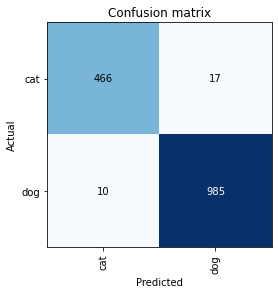

In [55]:
interp = ClassificationInterpretation.from_learner(lrnr2)
interp.plot_confusion_matrix()

In [56]:
interp.print_classification_report()

              precision    recall  f1-score   support

         cat       0.98      0.96      0.97       483
         dog       0.98      0.99      0.99       995

    accuracy                           0.98      1478
   macro avg       0.98      0.98      0.98      1478
weighted avg       0.98      0.98      0.98      1478



In [57]:
path=untar_data(URLs.PETS)/'images'

In [58]:
if str(list(path.ls())[103]).split('/')[-1].split('.')[-1]=="jpg" :
    print("jpg")
#name=str(list(path.ls())[i]).split('/')[-1]

jpg


In [59]:
path.ls()

(#7393) [Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/beagle_193.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Ragdoll_8.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/boxer_106.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/keeshond_56.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_162.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/pug_173.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_117.jpg')...]

In [65]:
for i in range(7393) :
    img = PILImage.create(get_image_files(path)[i])
    img = img.resize([512,512], resample=None, box=None, reducing_gap=None)
    name = str(list(path.ls())[i]).split('/')[-1]
    fname = name.split('.')[-1]
    if fname!="jpg" : 
        print(name)
    else : pass

KeyboardInterrupt: 

`.mat` 파일 같은 이상한 거 삭제

In [61]:
# os.remove(r"/home/csy/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat")

In [62]:
# os.remove(r"/home/csy/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.mat")

In [63]:
# os.remove(r"/home/csy/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat")

In [64]:
path.ls()

(#7390) [Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/beagle_193.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Ragdoll_8.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/boxer_106.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/keeshond_56.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_162.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/pug_173.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_117.jpg')...]

In [66]:
# os.mkdir("random_pet")

In [67]:
for i in range(len(path.ls())) :
    img = PILImage.create(get_image_files(path)[i])
    img = img.resize([512,512], resample=None, box=None, reducing_gap=None)
    (w, h) = (img.shape[0], img.shape[1])
    a = random.uniform(0, w*0.7)
    b = random.uniform(0, h*0.9)
    shape = [(a, b), (a+100, b+50)]
    font = ImageFont.truetype("DejaVuSans.ttf", round(h*0.08))
    name = str(list(path.ls())[i]).split('/')[-1]
    fname = name.split('.')[-1]
    if name[0].isupper() == True :
        img1 = ImageDraw.Draw(img)  
        img1.rectangle(shape, fill ="white", outline ="black")
        ImageDraw.Draw(img).text((a, b), 'CAT', (0,0,0), font=font)
        img.save("random_pet/"+name)
    else: 
        img1 = ImageDraw.Draw(img)  
        img1.rectangle(shape, fill ="black", outline ="black")
        ImageDraw.Draw(img).text((a, b), 'DOG', (255,255,255), font=font)
        img.save("random_pet/"+name)

In [68]:
path_r=Path('random_pet')   #랜덤박스넣은사진

In [69]:
files=get_image_files(path_r)

In [70]:
dls_r=ImageDataLoaders.from_name_func(path_r,files,label_func,item_tfms=Resize(512)) 

In [71]:
lrnr_r1=cnn_learner(dls_r,resnet34,metrics=error_rate)
lrnr_r1.fine_tune(1)

/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.132596,0.013171,0.004060,38:56


epoch,train_loss,valid_loss,error_rate,time
0,0.001943,0.000019,0.000000,52:14


In [77]:
net_1=lrnr_r1.model[0]
net_2=lrnr_r1.model[1] 

In [78]:
net_2 = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(output_size=1), 
    torch.nn.Flatten(),
    torch.nn.Linear(512,out_features=2,bias=False))

In [79]:
net_r=torch.nn.Sequential(net_1,net_2)

In [80]:
lrnr_r2=Learner(dls_r,net_r,metrics=accuracy) 

In [ ]:
lrnr_r2.fine_tune(10) 

epoch,train_loss,valid_loss,accuracy,time
0,0.097090,396752.718750,0.323410,51:26


epoch,train_loss,valid_loss,accuracy,time
0,0.003063,0.006902,0.999323,54:56


In [ ]:
interp = ClassificationInterpretation.from_learner(lrnr_r2)
interp.plot_confusion_matrix()

In [ ]:
x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[7389])]))

In [ ]:
camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())

In [ ]:
x.shape

In [ ]:
camimg.shape

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2) 
# 
dls_r.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(camimg[0].to("cpu").detach(),alpha=0.3,extent=(0,511,511,0),interpolation='bilinear',cmap='magma')
#
dls_r.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(camimg[1].to("cpu").detach(),alpha=0.3,extent=(0,511,511,0),interpolation='bilinear',cmap='magma')
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(5,5) 
k=0 
for i in range(5):
    for j in range(5): 
        x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[k])]))
        camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
        a,b = net_r(x).tolist()[0]
        catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b)) 
        if catprob>dogprob: 
            dls_r.train.decode((x,))[0].squeeze().show(ax=ax[i][j])
            ax[i][j].imshow(camimg[0].to("cpu").detach(),alpha=0.3,extent=(0,512,512,0),interpolation='bilinear',cmap='magma')
            ax[i][j].set_title("cat(%s)" % catprob.round(5))
        else: 
            dls_r.train.decode((x,))[0].squeeze().show(ax=ax[i][j])
            ax[i][j].imshow(camimg[1].to("cpu").detach(),alpha=0.3,extent=(0,512,512,0),interpolation='bilinear',cmap='magma')
            ax[i][j].set_title("dog(%s)" % dogprob.round(5))
        k=k+1 
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(5,5) 
k=0 
for i in range(5):
    for j in range(5): 
        x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[k])]))
        camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
        a,b = net_r(x).tolist()[0]
        catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b))
        if catprob>dogprob: 
            test=camimg[0]-torch.min(camimg[0])
            A1=torch.exp(-0.1*test)
            X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
            Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
            x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
            (x1*0.35).squeeze().show(ax=ax[i][j])
            ax[i][j].set_title("cat(%s)" % catprob.round(5))
        else: 
            test=camimg[1]-torch.min(camimg[1])
            A1=torch.exp(-0.1*test)
            X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
            Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
            x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
            (x1*0.35).squeeze().show(ax=ax[i][j])
            ax[i][j].set_title("dog(%s)" % dogprob.round(5))
        k=k+1 
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()

- `.mat`파일 있나 확인

In [ ]:
for i in range(len(path_r.ls())) :
    img = PILImage.create(get_image_files(path_r)[i])
    img = img.resize([512,512], resample=None, box=None, reducing_gap=None)
    name = str(list(path.ls())[i]).split('/')[-1]
    fname = name.split('.')[-1]
    if fname!="jpg" : 
        print(name)
    else : pass

In [ ]:
x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[1])]))
camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
a,b = net_r(x).tolist()[0]
catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b))
if catprob>dogprob: 
    test=camimg[0]-torch.min(camimg[0])
    A1=torch.exp(-0.07*test)
    X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
    Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
    x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
    (x1*0.35).squeeze().show()
else: 
        test=camimg[1]-torch.min(camimg[1])
        A1=torch.exp(-0.07*test)
        X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
        Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
        x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
        (x1*0.35).squeeze().show()

In [ ]:
# #저장 참고
# np_arr = np.array(tensor, dtype=np.uint8)
# img = PIL.Image.fromarray(np_arr)
# img.save('path')

In [54]:
# name = str(list(path.ls())[1]).split('/')[-1]
# res1=(x1*0.35).squeeze()
# res1.show()
# save_image(res1, "pet3_mode1_res/"+name)
#res1.save("pet3_mode1_res/"+name)